# Praktikum Machine Learning ke-3

## 1. Prepare Tools dan Cleaaring Dataset

In [538]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [539]:
df = pd.read_csv('Performa_Siswa_Anime(Train).csv')
df_test = pd.read_csv('Performa_Siswa_Anime(Test).csv')
submission = pd.read_csv('Performa_Siswa_Anime(Example).csv')

In [540]:
len(df)

6378

In [541]:
# cek apakah ada missing value pada data `train`
df.isna().sum()

Nama                              0
Jam_Belajar                     954
Kehadiran                       587
Keterlibatan_Orangtua           348
Akses_ke_Sumber_Daya            124
Kegiatan_Ekstrakurikuler          0
Jam_Tidur                       274
Nilai_Sebelumnya               2614
Tingkat_Motivasi                  0
Akses_Internet                   54
Sesi_Bimbingan                    0
Pendapatan_Keluarga            2104
Kualitas_Guru                   841
Jenis_Sekolah                     0
Pengaruh_Teman                    0
Aktivitas_Fisik                   0
Kesulitan_Belajar               786
Tingkat_Pendidikan_Orangtua     119
Jarak_dari_Rumah                  0
Nilai_Ujian                       0
dtype: int64

In [542]:
# menyimpan kolom numerik di vriabel `num`
num = []

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        num.append(label)
        print(label)

Jam_Belajar
Kehadiran
Jam_Tidur
Nilai_Sebelumnya
Sesi_Bimbingan
Aktivitas_Fisik
Nilai_Ujian


### Memisahkan data train menjadi 2 (train kategorikal dan train numerik)

In [544]:
# menyimpan kolom Objek di variabel `obj`
obj = []

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        obj.append(label)
        print(label)

Nama
Keterlibatan_Orangtua
Akses_ke_Sumber_Daya
Kegiatan_Ekstrakurikuler
Tingkat_Motivasi
Akses_Internet
Pendapatan_Keluarga
Kualitas_Guru
Jenis_Sekolah
Pengaruh_Teman
Kesulitan_Belajar
Tingkat_Pendidikan_Orangtua
Jarak_dari_Rumah


In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nama                         6378 non-null   object 
 1   Jam_Belajar                  5424 non-null   float64
 2   Kehadiran                    5791 non-null   float64
 3   Keterlibatan_Orangtua        6030 non-null   object 
 4   Akses_ke_Sumber_Daya         6254 non-null   object 
 5   Kegiatan_Ekstrakurikuler     6378 non-null   object 
 6   Jam_Tidur                    6104 non-null   float64
 7   Nilai_Sebelumnya             3764 non-null   float64
 8   Tingkat_Motivasi             6378 non-null   object 
 9   Akses_Internet               6324 non-null   object 
 10  Sesi_Bimbingan               6378 non-null   int64  
 11  Pendapatan_Keluarga          4274 non-null   object 
 12  Kualitas_Guru                5537 non-null   object 
 13  Jenis_Sekolah     

In [546]:
# split menjadi 2 bagian

df_num = df[num]
df_obj = df[obj]

df_num = df_num.copy()
df_obj = df_obj.copy()

In [547]:
# cek apakah ada missing value pada data numerik
df_num.isna().sum()

Jam_Belajar          954
Kehadiran            587
Jam_Tidur            274
Nilai_Sebelumnya    2614
Sesi_Bimbingan         0
Aktivitas_Fisik        0
Nilai_Ujian            0
dtype: int64

In [548]:
# isi kolom numerik dengan median
for label, content in df_num.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_num[label] = content.fillna(content.median())

In [549]:
df_num.isna().sum()

Jam_Belajar         0
Kehadiran           0
Jam_Tidur           0
Nilai_Sebelumnya    0
Sesi_Bimbingan      0
Aktivitas_Fisik     0
Nilai_Ujian         0
dtype: int64

In [550]:
# handling df_obj
df_obj.isna().sum()

Nama                              0
Keterlibatan_Orangtua           348
Akses_ke_Sumber_Daya            124
Kegiatan_Ekstrakurikuler          0
Tingkat_Motivasi                  0
Akses_Internet                   54
Pendapatan_Keluarga            2104
Kualitas_Guru                   841
Jenis_Sekolah                     0
Pengaruh_Teman                    0
Kesulitan_Belajar               786
Tingkat_Pendidikan_Orangtua     119
Jarak_dari_Rumah                  0
dtype: int64

In [551]:
# isi df_obj yang hilang pada kolom kategorikal menggunakan modus
df_obj.fillna(df_obj.mode().iloc[0], inplace=True)

In [552]:
df_obj.isna().sum()

Nama                           0
Keterlibatan_Orangtua          0
Akses_ke_Sumber_Daya           0
Kegiatan_Ekstrakurikuler       0
Tingkat_Motivasi               0
Akses_Internet                 0
Pendapatan_Keluarga            0
Kualitas_Guru                  0
Jenis_Sekolah                  0
Pengaruh_Teman                 0
Kesulitan_Belajar              0
Tingkat_Pendidikan_Orangtua    0
Jarak_dari_Rumah               0
dtype: int64

In [553]:
df_obj.drop('Nama', axis=1, inplace=True)

In [554]:
df_obj.nunique()

Keterlibatan_Orangtua          3
Akses_ke_Sumber_Daya           3
Kegiatan_Ekstrakurikuler       2
Tingkat_Motivasi               3
Akses_Internet                 2
Pendapatan_Keluarga            3
Kualitas_Guru                  3
Jenis_Sekolah                  2
Pengaruh_Teman                 3
Kesulitan_Belajar              2
Tingkat_Pendidikan_Orangtua    3
Jarak_dari_Rumah               3
dtype: int64

## Preprocessing

Menggunakan `OrdinaalEncoder` untuk konversi kolom kategorikal menjadi numerik

In [557]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Tentukan urutan kategori untuk setiap kolom sesuai konteks
categories = [
    ['Low', 'Medium', 'High'],  
    ['Low', 'Medium', 'High'],  
    ['No', 'Yes'],              
    ['Low', 'Medium', 'High'],  
    ['No', 'Yes'],              
    ['Low', 'Medium', 'High'],  
    ['Low', 'Medium', 'High'],  
    ['Public', 'Private'],      
    ['Negative', 'Neutral', 'Positive'],  
    ['No', 'Yes'],              
    ['High School', 'College', 'Postgraduate'],  
    ['Near', 'Moderate', 'Far']  
]

# Inisialisasi OrdinalEncoder dengan kategori yang telah ditentukan
encoder = OrdinalEncoder(categories=categories)

# Lakukan encoding hanya pada data kategorikal
df_obj_encode = encoder.fit_transform(df_obj)

In [558]:
df_obj_encode

array([[0., 2., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 2., 0.],
       ...,
       [1., 0., 1., ..., 0., 2., 0.],
       [2., 2., 1., ..., 0., 0., 2.],
       [1., 0., 1., ..., 0., 2., 0.]])

In [559]:
col = df_obj.columns

df_obj_trans = pd.DataFrame(data=df_obj_encode, columns=col)
df_obj_trans

,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Tingkat_Motivasi,Akses_Internet,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah
0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6373,2.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0
6374,2.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0
6375,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0
6376,2.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0


In [560]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Keterlibatan_Orangtua        6378 non-null   object
 1   Akses_ke_Sumber_Daya         6378 non-null   object
 2   Kegiatan_Ekstrakurikuler     6378 non-null   object
 3   Tingkat_Motivasi             6378 non-null   object
 4   Akses_Internet               6378 non-null   object
 5   Pendapatan_Keluarga          6378 non-null   object
 6   Kualitas_Guru                6378 non-null   object
 7   Jenis_Sekolah                6378 non-null   object
 8   Pengaruh_Teman               6378 non-null   object
 9   Kesulitan_Belajar            6378 non-null   object
 10  Tingkat_Pendidikan_Orangtua  6378 non-null   object
 11  Jarak_dari_Rumah             6378 non-null   object
dtypes: object(12)
memory usage: 598.1+ KB


In [561]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Jam_Belajar       6378 non-null   float64
 1   Kehadiran         6378 non-null   float64
 2   Jam_Tidur         6378 non-null   float64
 3   Nilai_Sebelumnya  6378 non-null   float64
 4   Sesi_Bimbingan    6378 non-null   int64  
 5   Aktivitas_Fisik   6378 non-null   int64  
 6   Nilai_Ujian       6378 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 348.9 KB


In [562]:
# gabungkan kedua dataset
df_fix = pd.concat([df_obj_trans, df_num], axis=1)
df_fix

,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Tingkat_Motivasi,Akses_Internet,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Jam_Belajar,Kehadiran,Jam_Tidur,Nilai_Sebelumnya,Sesi_Bimbingan,Aktivitas_Fisik,Nilai_Ujian
0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,20.0,84.0,7.0,75.0,0,3,67
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,19.0,80.0,8.0,75.0,2,4,61
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,24.0,98.0,7.0,75.0,2,4,74
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,29.0,89.0,8.0,98.0,1,4,71
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,20.0,92.0,6.0,65.0,3,4,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,2.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,25.0,69.0,7.0,75.0,1,2,68
6374,2.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,23.0,76.0,8.0,81.0,3,2,69
6375,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,20.0,90.0,6.0,75.0,3,2,68
6376,2.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,10.0,86.0,6.0,75.0,2,3,68


## EDA

(19.5, -0.5)

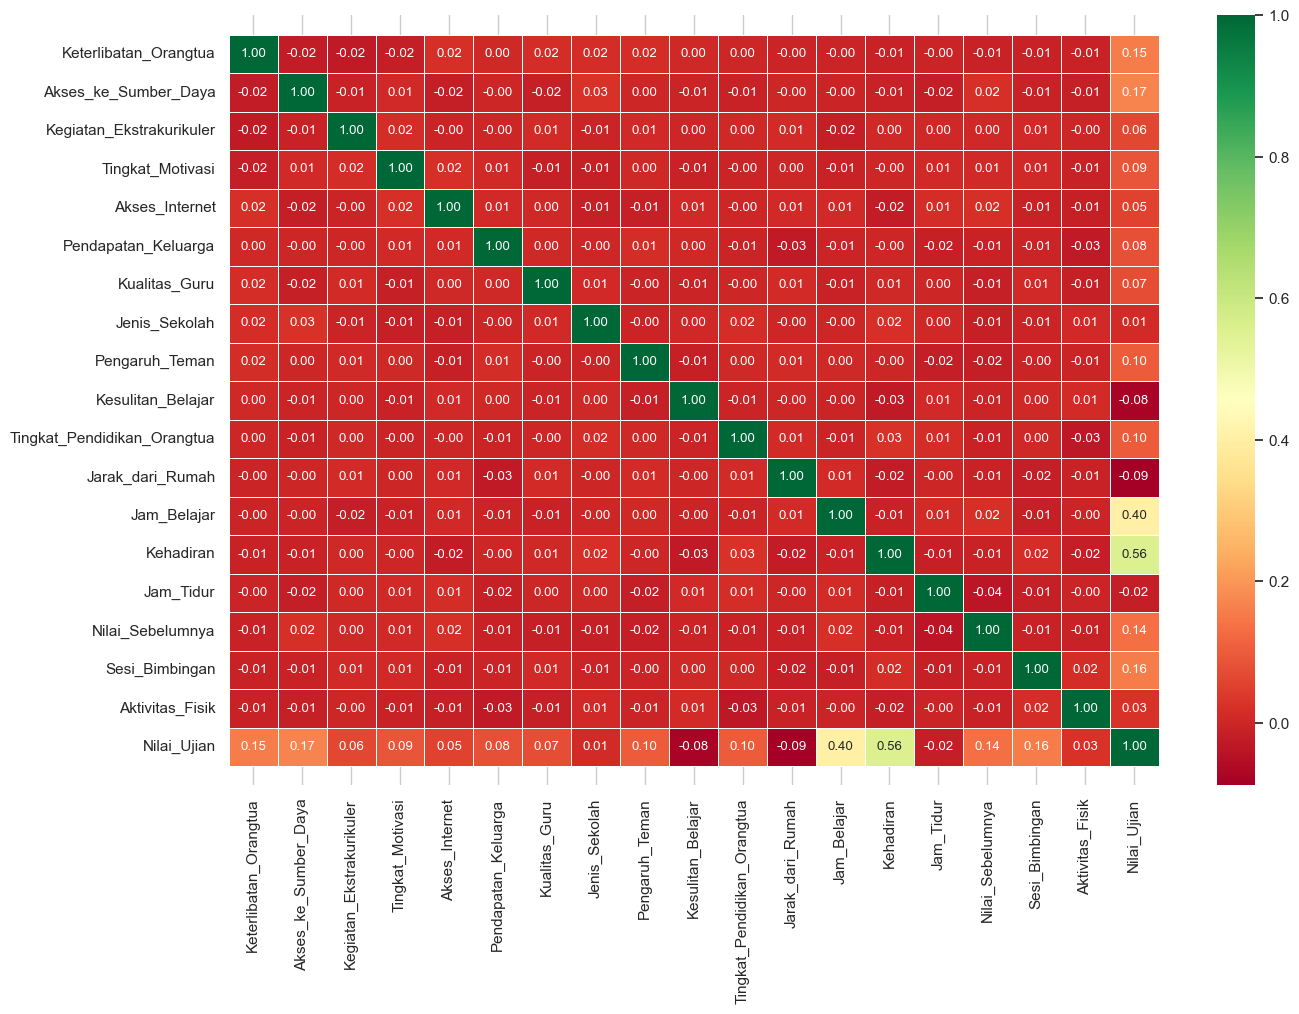

In [564]:
corr_matrix = df_fix.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlGn",
                 annot_kws={"size": 9.5})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

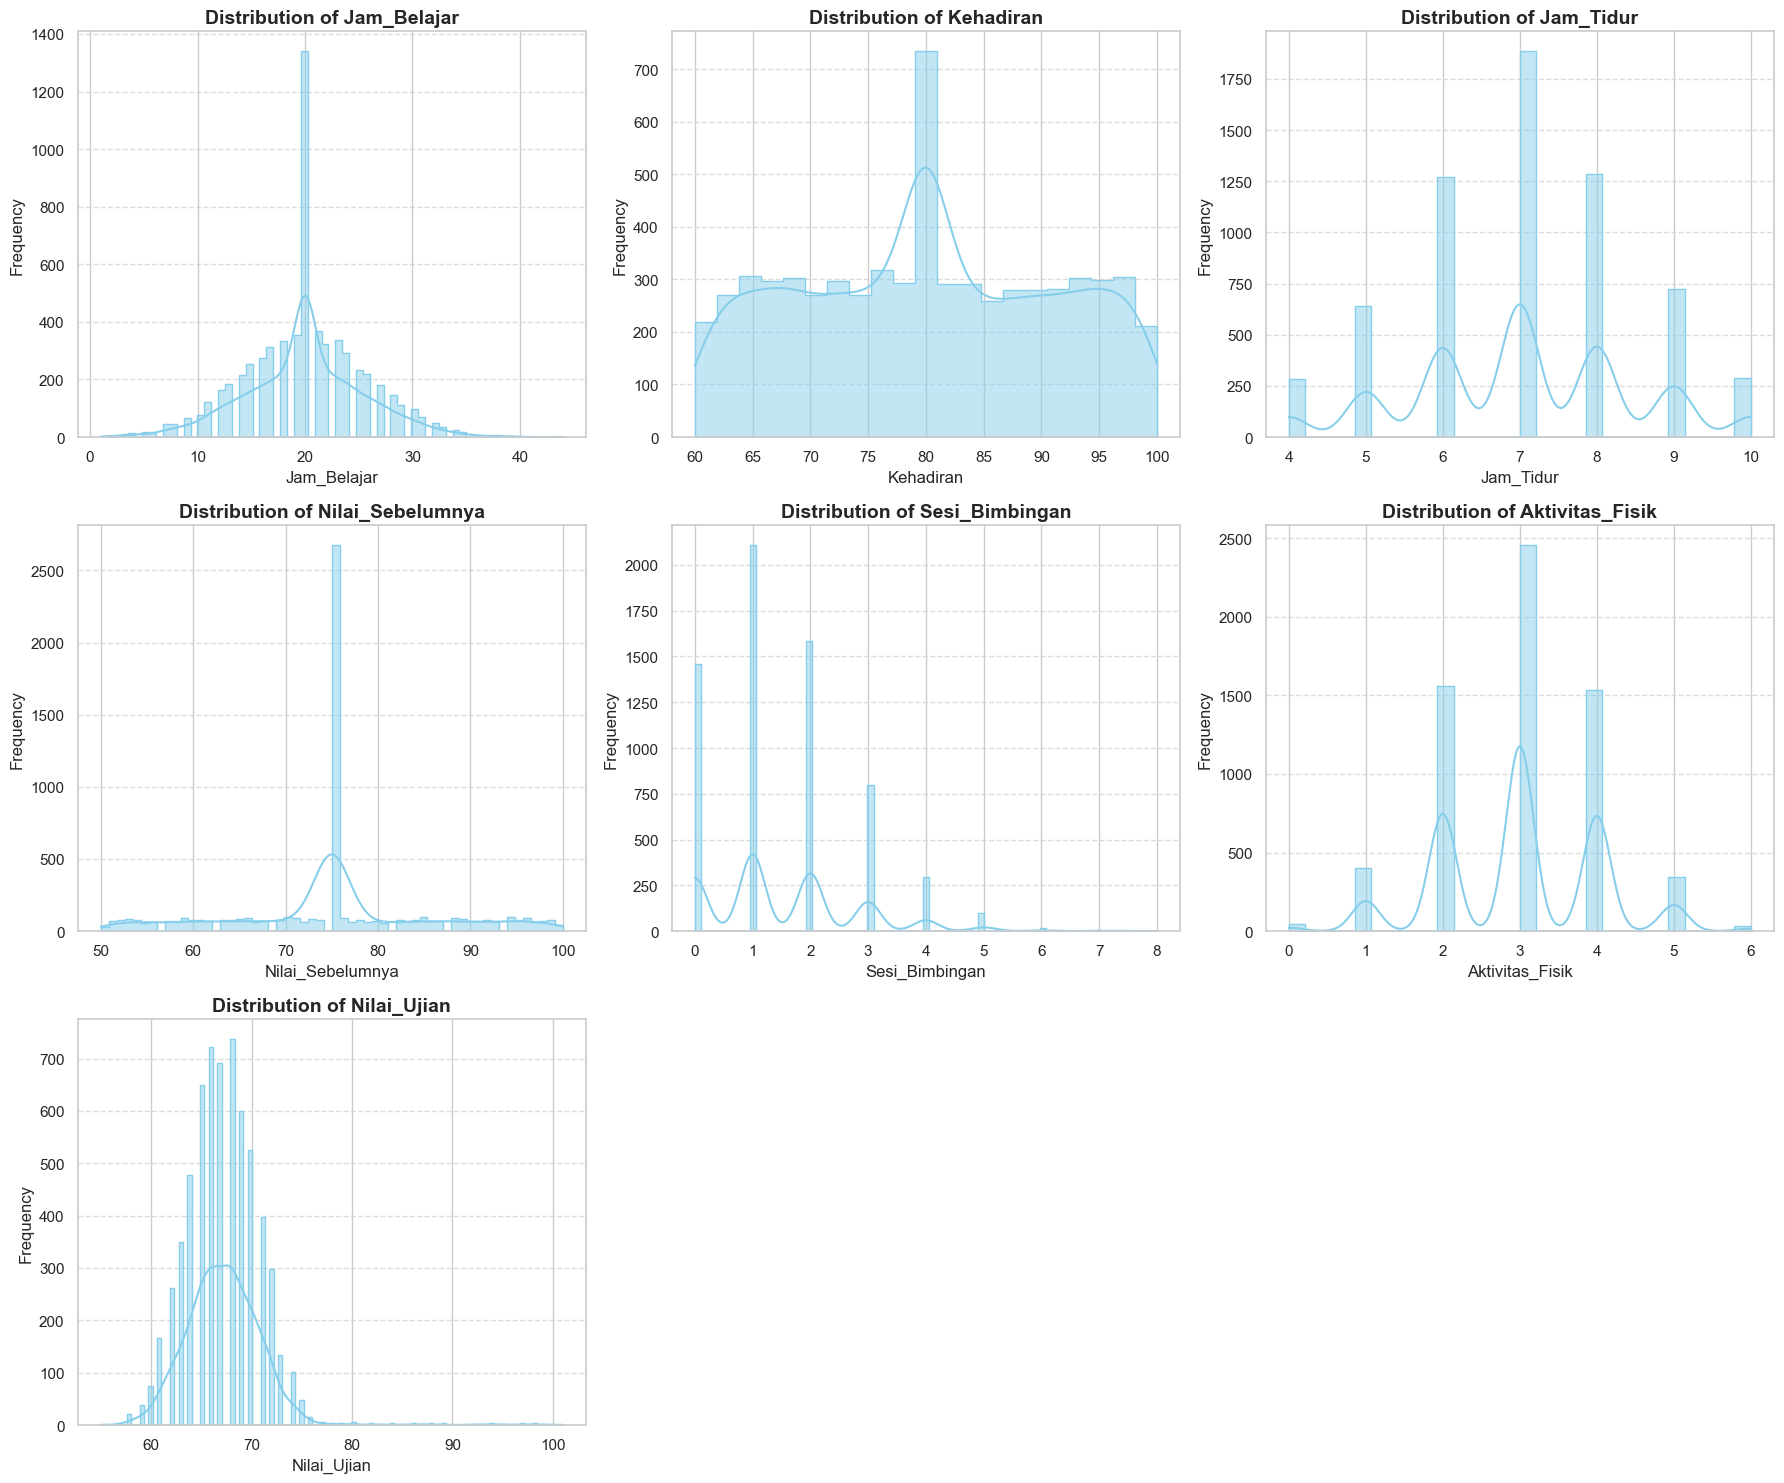

In [565]:
# Melihat distribusi kolom
n_cols = 3
n_rows = (len(df_num.columns) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(18, n_rows * 5))

# Membuat visualisasi histogram untuk setiap kolom dalam df_num
for i, column in enumerate(df_num.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df_num, x=column, kde=True, color='skyblue', element='step')
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

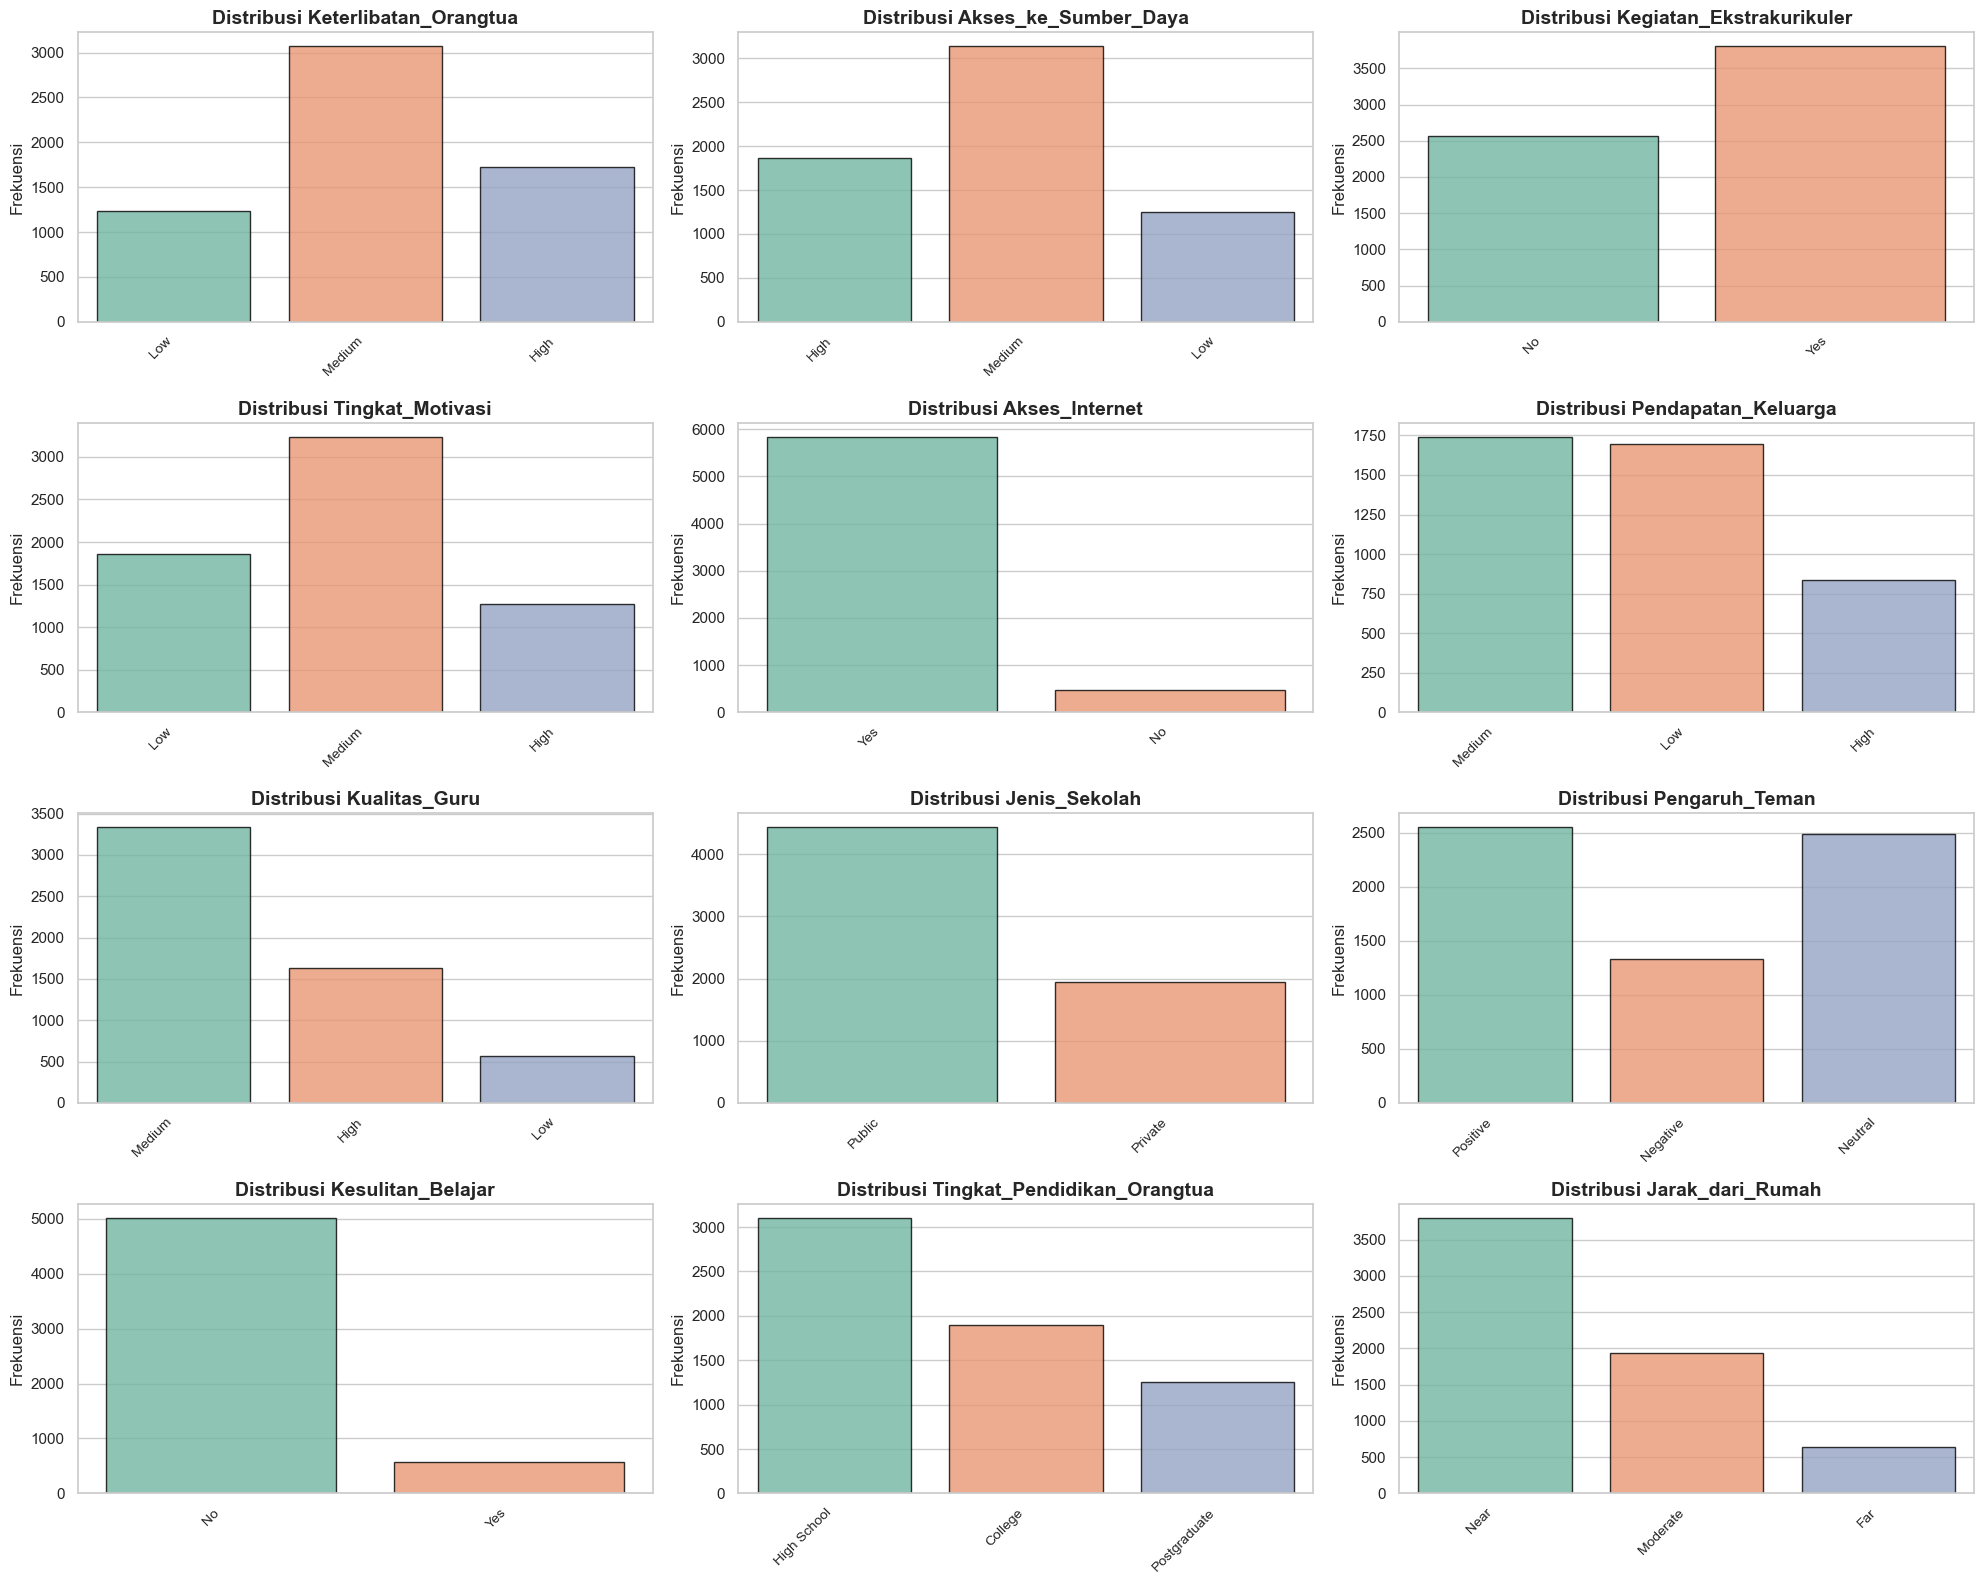

In [566]:
import warnings
warnings.filterwarnings("ignore")

# Set style dan palet warna
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")  # Pilih palet warna yang menarik

# Atur ukuran gambar untuk beberapa subplot
plt.figure(figsize=(20, 16))

# Loop melalui setiap kolom kategorikal dan buat plot
for i, col in enumerate(df_obj.columns, 1):
    plt.subplot(4, 3, i)  # Atur menjadi 4 baris dan 3 kolom
    sns.countplot(data=df, x=col, palette=palette, edgecolor="black", alpha=0.8)
    plt.title(f'Distribusi {col}', fontsize=14, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("Frekuensi", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)

# Menyusun plot agar tampil rapi
plt.tight_layout()
plt.show()

#### Melihat distribusi sesudah di encode

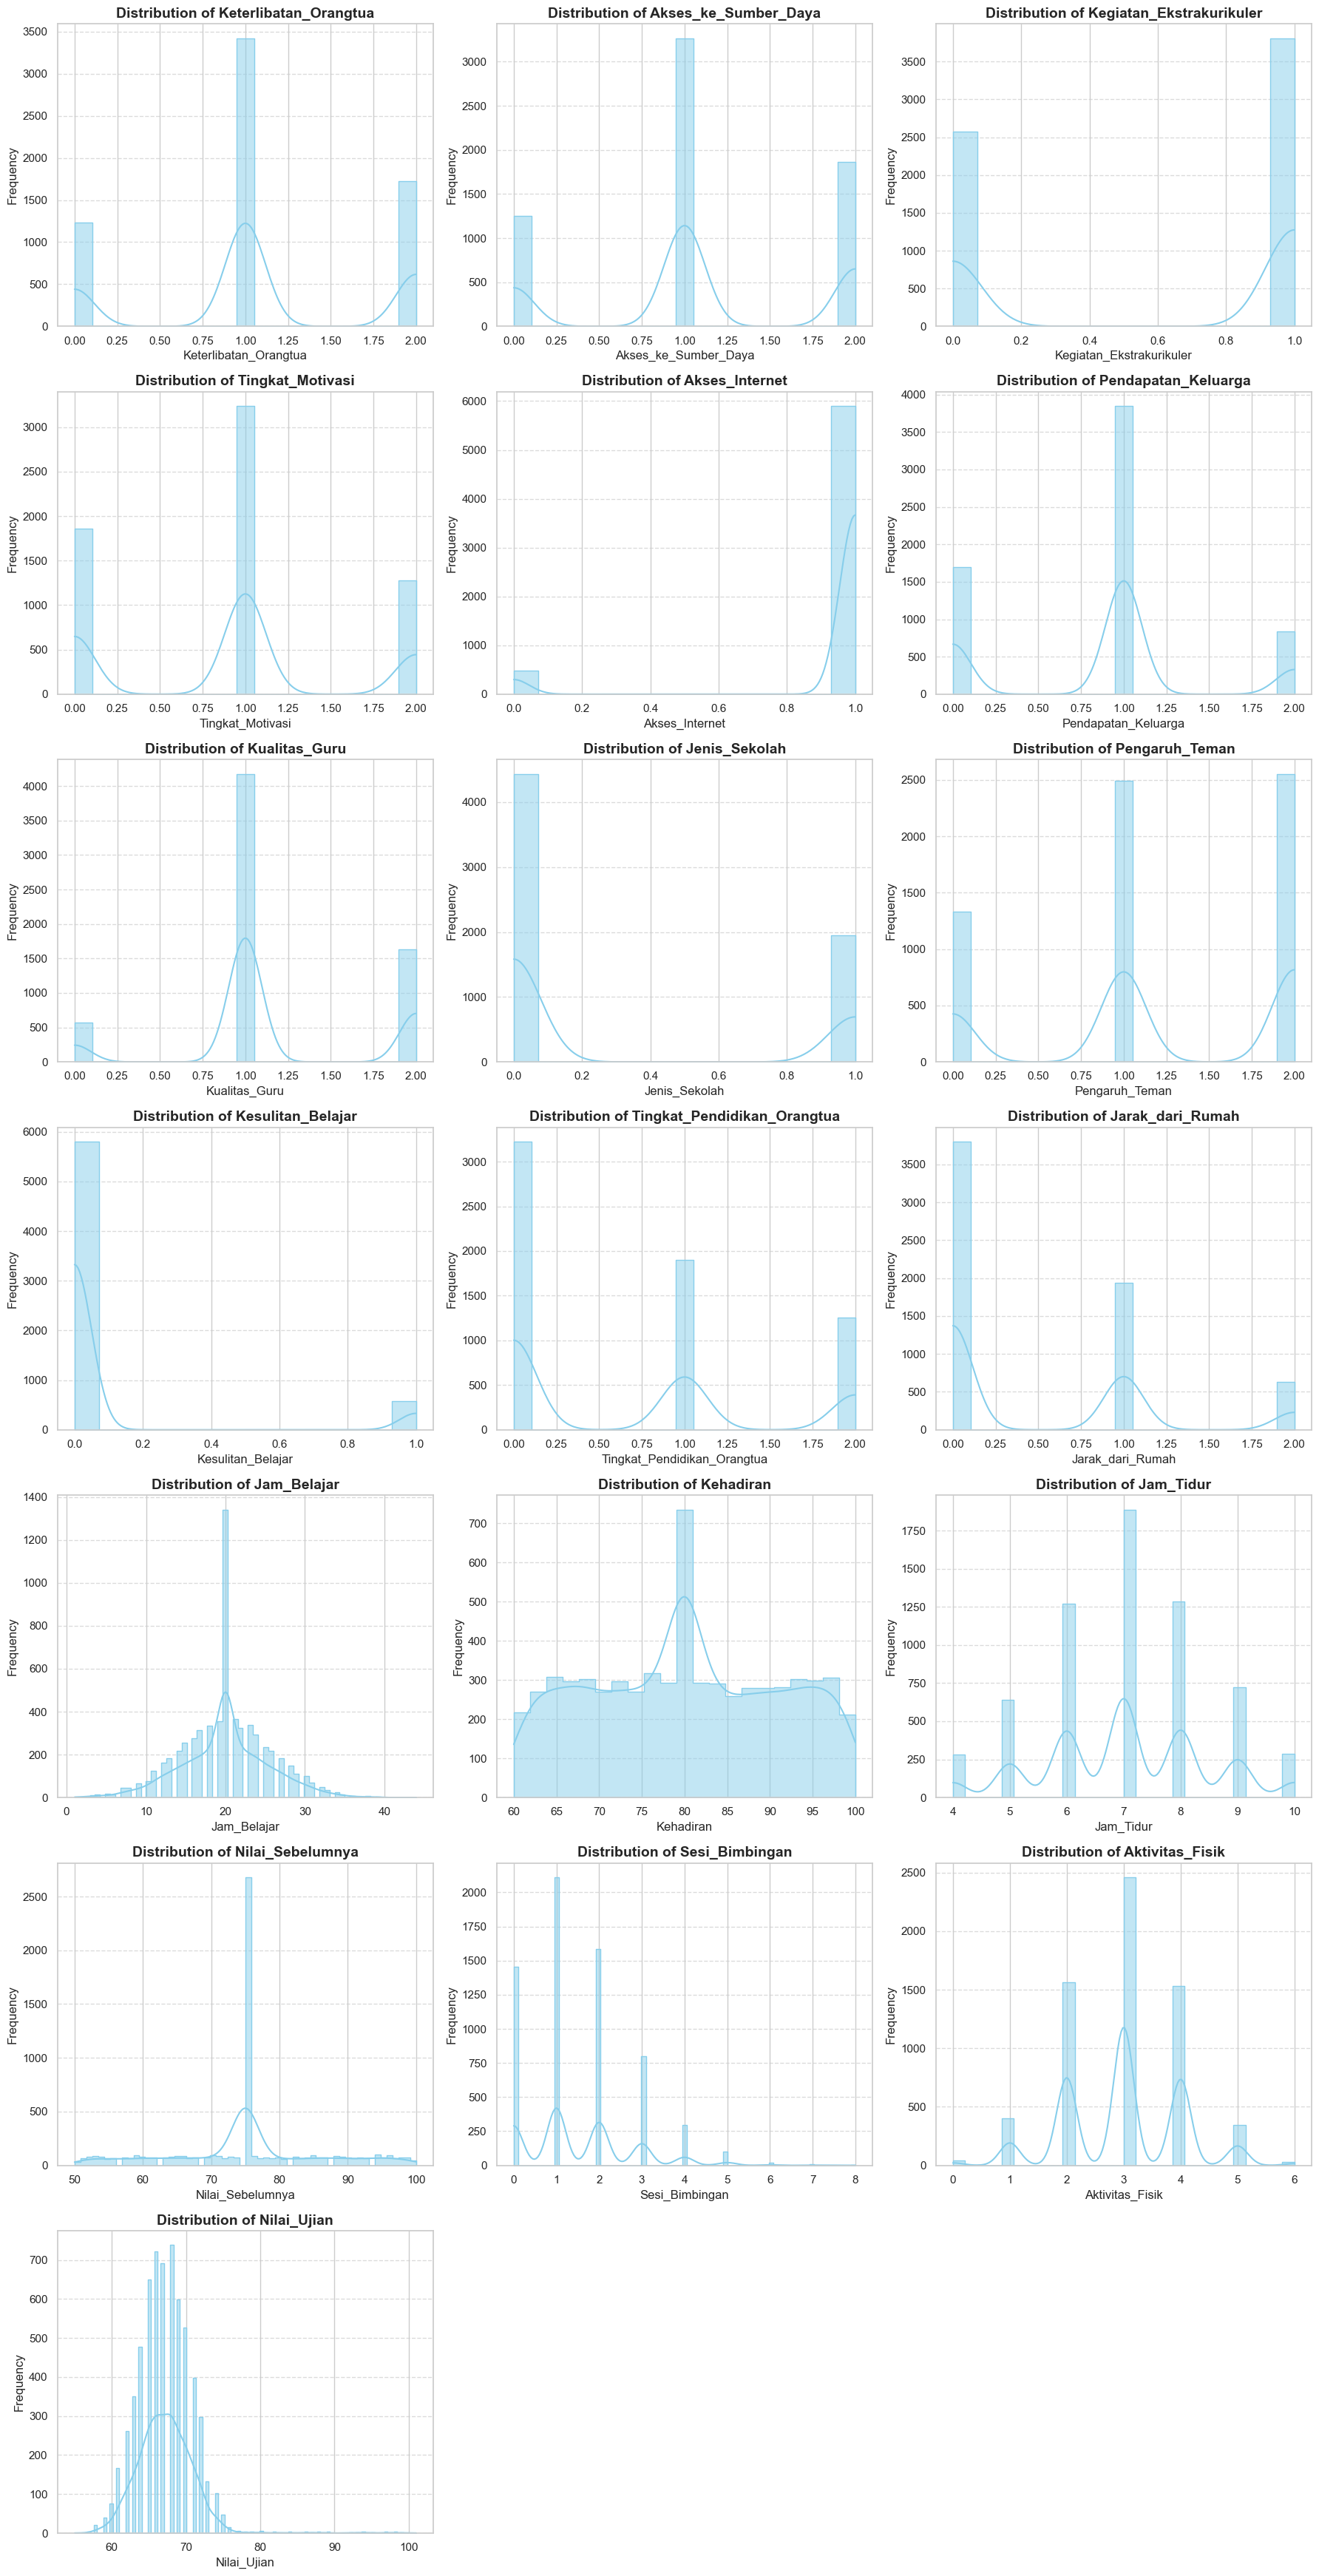

In [568]:
# Melihat distribusi kolom
n_cols = 3
n_rows = (len(df_fix.columns) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(18, n_rows * 5))

# Membuat visualisasi histogram untuk setiap kolom dalam df_fix
for i, column in enumerate(df_fix.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df_fix, x=column, kde=True, color='skyblue', element='step')
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

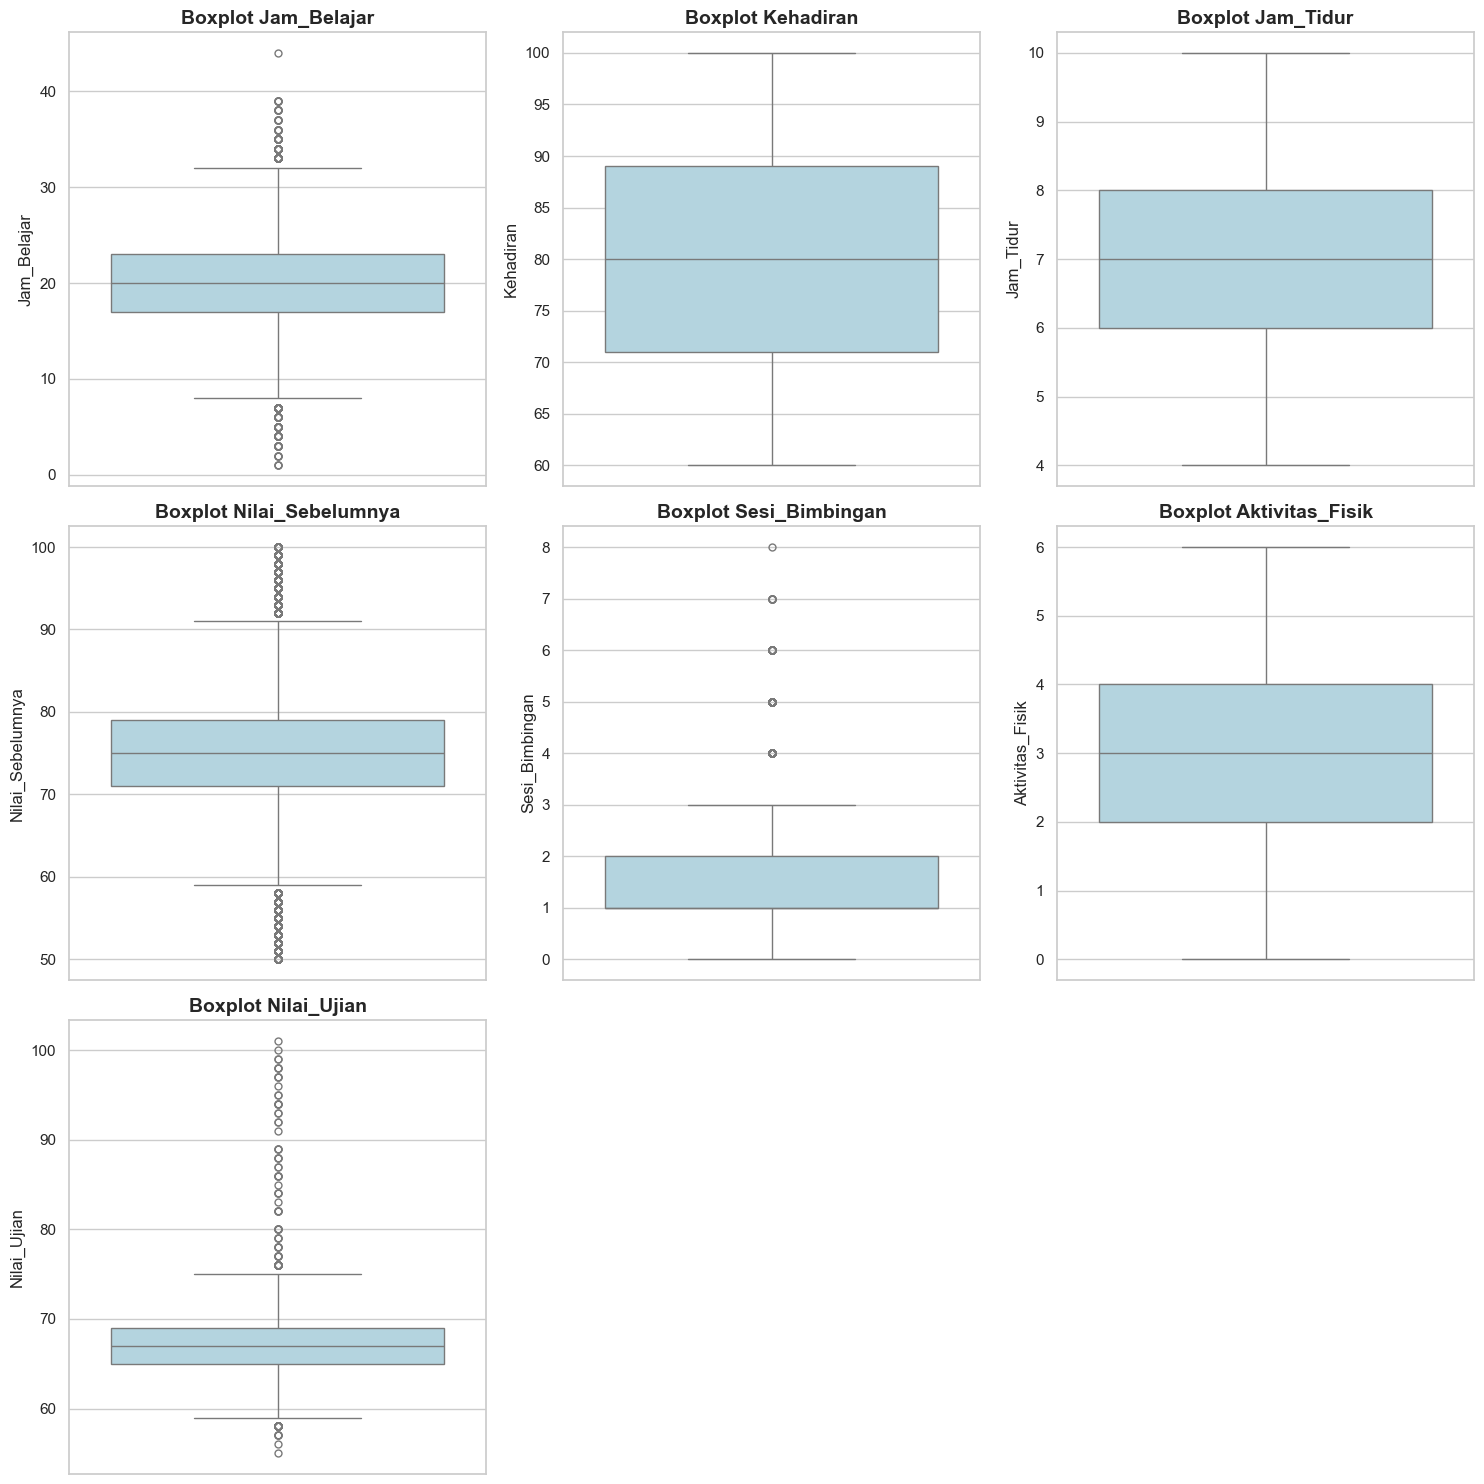

In [569]:
# Set style
sns.set(style="whitegrid")

# Atur ukuran gambar untuk beberapa subplot (3x3)
plt.figure(figsize=(15, 15))

# Loop melalui setiap kolom numerik dan buat plot boxplot
for i, col in enumerate(df_num.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)  # Atur menjadi 3 baris dan 3 kolom
    sns.boxplot(data=df_num, y=col, color="lightblue", fliersize=5)
    plt.title(f'Boxplot {col}', fontsize=14, fontweight='bold')
    plt.xlabel("")
    plt.ylabel(col, fontsize=12)

# Menyusun plot agar tampil rapi
plt.tight_layout()
plt.show()

## Modelling

Selanjutnya melakukan Scaling pada Data menggunakan `StandartSscaler`

In [572]:
from sklearn.model_selection import train_test_split

X = df_fix.drop(['Nilai_Ujian'], axis=1)
y = df_fix['Nilai_Ujian']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

col_xtrain = X_train.columns
col_xtest = X_test.columns

In [573]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_trainscaled = scaler.fit_transform(X_train)

X_testscaled = scaler.transform(X_test)

In [574]:
X_train_scaled = pd.DataFrame(data=X_trainscaled, columns=col_xtrain)
X_test_scaled = pd.DataFrame(data=X_testscaled, columns=col_xtest)

In [575]:
X_train_scaled

,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Tingkat_Motivasi,Akses_Internet,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Jam_Belajar,Kehadiran,Jam_Tidur,Nilai_Sebelumnya,Sesi_Bimbingan,Aktivitas_Fisik
0,-1.603854,1.296662,-1.210754,0.142574,0.282873,0.206146,1.483261,1.528667,1.074365,3.169115,-0.889656,0.748154,-0.364952,1.360738,-0.029115,1.891614,0.414729,0.998735
1,1.374440,-0.141193,0.825932,-1.297848,0.282873,-1.406976,-0.294840,-0.654165,-0.247731,-0.315546,0.396551,0.748154,-0.005530,0.000924,0.668282,-1.534632,0.414729,0.032022
2,-0.114707,1.296662,0.825932,0.142574,0.282873,0.206146,1.483261,-0.654165,-1.569827,-0.315546,-0.889656,0.748154,-0.724374,-0.996273,-0.726512,-0.001838,-0.397223,-1.901405
3,-0.114707,1.296662,-1.210754,0.142574,0.282873,0.206146,-0.294840,-0.654165,-0.247731,-0.315546,1.682759,-0.744643,-0.005530,-1.358890,-0.029115,0.268655,0.414729,0.032022
4,-0.114707,1.296662,0.825932,-1.297848,-3.535160,-1.406976,-0.294840,-0.654165,1.074365,-0.315546,-0.889656,-0.744643,0.174181,1.360738,-0.029115,-0.001838,-0.397223,0.032022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,1.374440,-1.579047,-1.210754,1.582996,0.282873,0.206146,-0.294840,-0.654165,1.074365,-0.315546,1.682759,-0.744643,1.791579,-0.905619,-0.726512,0.809642,0.414729,0.032022
5098,-1.603854,-1.579047,0.825932,1.582996,0.282873,-1.406976,-0.294840,-0.654165,1.074365,-0.315546,-0.889656,-0.744643,0.713314,0.907467,1.365679,-0.001838,1.226681,0.998735
5099,-1.603854,1.296662,0.825932,0.142574,0.282873,1.819267,-0.294840,-0.654165,-0.247731,-0.315546,1.682759,0.748154,0.713314,-1.358890,-0.029115,-2.075619,-0.397223,-1.901405
5100,-0.114707,1.296662,0.825932,-1.297848,0.282873,0.206146,1.483261,-0.654165,1.074365,-0.315546,0.396551,-0.744643,1.791579,0.998121,-0.029115,-0.001838,-0.397223,0.032022


In [576]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

models = {"Random Forest": RandomForestRegressor(),
          "Xgb": XGBRegressor(),
          "Catboost": CatBoostRegressor(),
          "Ridge": Ridge(alpha=1.0),
          "SVR": SVR()}

# membuat fungsi untuk memasukan model dan scoring
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [577]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_scaled,
                             X_test=X_test_scaled,
                             y_train=y_train,
                             y_test=y_test)

model_scores

Learning rate set to 0.052967
0:	learn: 3.8288900	total: 1.73ms	remaining: 1.73s
1:	learn: 3.7530513	total: 2.92ms	remaining: 1.46s
2:	learn: 3.6846734	total: 4.27ms	remaining: 1.42s
3:	learn: 3.6167449	total: 5.53ms	remaining: 1.38s
4:	learn: 3.5522638	total: 6.98ms	remaining: 1.39s
5:	learn: 3.4937691	total: 8.28ms	remaining: 1.37s
6:	learn: 3.4379452	total: 9.35ms	remaining: 1.32s
7:	learn: 3.3833444	total: 10.5ms	remaining: 1.3s
8:	learn: 3.3309866	total: 11.8ms	remaining: 1.3s
9:	learn: 3.2888320	total: 13.2ms	remaining: 1.31s
10:	learn: 3.2442820	total: 14.5ms	remaining: 1.3s
11:	learn: 3.2027960	total: 15.6ms	remaining: 1.29s
12:	learn: 3.1678093	total: 17ms	remaining: 1.29s
13:	learn: 3.1318527	total: 18.3ms	remaining: 1.28s
14:	learn: 3.0979728	total: 19.4ms	remaining: 1.27s
15:	learn: 3.0677721	total: 20.5ms	remaining: 1.26s
16:	learn: 3.0398240	total: 21.6ms	remaining: 1.25s
17:	learn: 3.0146450	total: 23.2ms	remaining: 1.27s
18:	learn: 2.9900329	total: 24.5ms	remaining: 1.2

{'Random Forest': 0.5826533323035882,
 'Xgb': 0.5549038648605347,
 'Catboost': 0.6415030519601876,
 'Ridge': 0.662471473622707,
 'SVR': 0.6430144300084122}

In [578]:
model = Ridge(alpha=0.1)
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.662472839633198

In [579]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# membuat fungsi untuk bahan evaluasi model
def show_scores_with_mse(model):
    train_preds = model.predict(X_train_scaled)
    val_preds = model.predict(X_test_scaled)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_test, val_preds),
        "Training R^2": model.score(X_train_scaled, y_train),
        "Valid R^2": model.score(X_test_scaled, y_test),
        "Training MSE": mean_squared_error(y_train, train_preds),
        "Valid MSE": mean_squared_error(y_test, val_preds)
    }
    return scores

In [580]:
show_scores_with_mse(model)

{'Training MAE': 0.9839905409976341,
 'Valid MAE': 0.9424011070801439,
 'Training R^2': 0.6288747011092968,
 'Valid R^2': 0.662472839633198,
 'Training MSE': 5.664631885158646,
 'Valid MSE': 5.244944236872013}

# Handling Data test

In [582]:
df_test.head()

,Nama,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah
0,Ouzen (オーゼン),20.0,77,Medium,High,Yes,7,53,Medium,Yes,1,Low,Medium,Public,Positive,4,No,High School,Near
1,"Yuigahama, Yui (由比ヶ浜 結衣)",28.0,95,Medium,Medium,Yes,8,80,Medium,Yes,0,NaN,Medium,Private,Negative,2,No,High School,Moderate
2,Hiei (飛影),21.0,85,Medium,High,Yes,5,53,Medium,Yes,2,Low,Medium,Private,Neutral,3,No,College,Near
3,Dabi (荼毘),16.0,87,High,Medium,Yes,7,79,Medium,Yes,1,Low,Medium,Public,Neutral,4,No,Postgraduate,Moderate
4,"Nikiforov, Victor (ヴィクトル・ニキフォロフ)",24.0,80,High,Medium,Yes,7,72,Medium,No,2,Medium,Medium,Public,Neutral,3,No,High School,Near


In [583]:
num_test = []
obj_test = []

for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        num_test.append(label)

for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        obj_test.append(label)

In [584]:
# split menjadi 2 bagian
test_num = df_test[num_test]
test_obj = df_test[obj_test]

test_num = test_num.copy()
test_obj = test_obj.copy()

In [585]:
# fill numeric rows with the median 
for label, content in test_num.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test_num[label] = content.fillna(content.median())

In [586]:
# isi test_obj yang hilang pada kolom kategorikal menggunakan modus
test_obj.fillna(test_obj.mode().iloc[0], inplace=True)

In [587]:
test_obj.drop('Nama', axis=1, inplace=True)

In [588]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Tentukan urutan kategori untuk setiap kolom sesuai konteks
categories = [
    ['Low', 'Medium', 'High'],  
    ['Low', 'Medium', 'High'],  
    ['No', 'Yes'],              
    ['Low', 'Medium', 'High'],  
    ['No', 'Yes'],              
    ['Low', 'Medium', 'High'],  
    ['Low', 'Medium', 'High'],  
    ['Public', 'Private'],      
    ['Negative', 'Neutral', 'Positive'],  
    ['No', 'Yes'],              
    ['High School', 'College', 'Postgraduate'],  
    ['Near', 'Moderate', 'Far']  
]

# Inisialisasi OrdinalEncoder dengan kategori yang telah ditentukan
encoder = OrdinalEncoder(categories=categories)

# Lakukan encoding hanya pada dataset
test_obj_encode = encoder.fit_transform(test_obj)

In [589]:
test_obj_encode

array([[1., 2., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 1., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [2., 1., 0., ..., 0., 1., 1.],
       [1., 2., 0., ..., 0., 1., 0.]])

In [590]:
col1 = test_obj.columns

In [591]:
test_trans = pd.DataFrame(data=test_obj_encode, columns=col1)
test_trans.head()

,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Tingkat_Motivasi,Akses_Internet,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah
0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
3,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
4,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [592]:
test_obj.nunique()

Keterlibatan_Orangtua          3
Akses_ke_Sumber_Daya           3
Kegiatan_Ekstrakurikuler       2
Tingkat_Motivasi               3
Akses_Internet                 2
Pendapatan_Keluarga            3
Kualitas_Guru                  3
Jenis_Sekolah                  2
Pengaruh_Teman                 3
Kesulitan_Belajar              2
Tingkat_Pendidikan_Orangtua    3
Jarak_dari_Rumah               3
dtype: int64

In [593]:
# gabungkan kedua dataset
df_fix_test = pd.concat([test_trans, test_num], axis=1)
df_fix_test

,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Tingkat_Motivasi,Akses_Internet,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Jam_Belajar,Kehadiran,Jam_Tidur,Nilai_Sebelumnya,Sesi_Bimbingan,Aktivitas_Fisik
0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,20.0,77,7,53,1,4
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,28.0,95,8,80,0,2
2,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,21.0,85,5,53,2,3
3,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,16.0,87,7,79,1,4
4,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,24.0,80,7,72,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,16.0,81,9,61,3,2
1038,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,0.0,19.0,64,8,59,2,1
1039,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,20.0,61,7,71,2,3
1040,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,15.0,96,7,94,3,3


In [594]:
col_test = df_fix_test.columns
df_testscaled = scaler.fit_transform(df_fix_test)

df_test_scaled = pd.DataFrame(data=df_testscaled, columns=col_test)
df_test_scaled

,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Tingkat_Motivasi,Akses_Internet,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Jam_Belajar,Kehadiran,Jam_Tidur,Nilai_Sebelumnya,Sesi_Bimbingan,Aktivitas_Fisik
0,-0.194700,1.146490,0.668747,0.211568,0.347030,-1.222434,-0.313066,-0.673259,0.838908,-0.288375,-1.020959,-0.784149,0.030273,-0.274710,-0.026820,-1.565917,-0.376576,1.031580
1,-0.194700,-0.308617,0.668747,0.211568,0.347030,0.292163,-0.313066,1.485313,-1.927364,-0.288375,-1.020959,0.821123,1.401768,1.292338,0.708602,0.324796,-1.218620,-1.008090
2,-0.194700,1.146490,0.668747,0.211568,0.347030,-1.222434,-0.313066,1.485313,-0.544228,-0.288375,0.284365,-0.784149,0.201710,0.421756,-1.497663,-1.565917,0.465468,0.011745
3,1.297047,-0.308617,0.668747,0.211568,0.347030,-1.222434,-0.313066,-0.673259,-0.544228,-0.288375,1.589690,0.821123,-0.655475,0.595872,-0.026820,0.254770,-0.376576,1.031580
4,1.297047,-0.308617,0.668747,0.211568,-2.881592,0.292163,-0.313066,-0.673259,-0.544228,-0.288375,-1.020959,-0.784149,0.716020,-0.013535,-0.026820,-0.235415,0.465468,0.011745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,-0.194700,-0.308617,-1.495334,0.211568,0.347030,1.806760,1.422117,-0.673259,-0.544228,-0.288375,-1.020959,-0.784149,-0.655475,0.073523,1.444024,-1.005706,1.307512,-1.008090
1038,1.297047,-0.308617,0.668747,0.211568,0.347030,1.806760,-0.313066,1.485313,0.838908,-0.288375,0.284365,-0.784149,-0.141164,-1.406466,0.708602,-1.145759,0.465468,-2.027925
1039,-0.194700,-0.308617,-1.495334,1.681263,0.347030,0.292163,-2.048248,-0.673259,0.838908,-0.288375,-1.020959,-0.784149,0.030273,-1.667641,-0.026820,-0.305442,0.465468,0.011745
1040,1.297047,-0.308617,-1.495334,-1.258126,-2.881592,0.292163,-0.313066,1.485313,-0.544228,-0.288375,0.284365,0.821123,-0.826911,1.379396,-0.026820,1.305166,1.307512,0.011745


## Melakukan Prediksi pada Data test yang barusan diolah

### Coba menggunakan Model `Ridge`

**Ridge Regression** adalah model regresi yang mirip dengan regresi linear, tetapi dengan tambahan penalti untuk mencegah overfitting, terutama saat data memiliki fitur yang sangat mirip atau berkorelasi tinggi.

Bayangkan membuat garis lurus untuk memprediksi harga rumah berdasarkan ukuran dan lokasi. Jika ada banyak rumah dengan ukuran mirip tapi harga berbeda karena lokasi, model mungkin kebingungan dan memprediksi harga kurang akurat. Ridge Regression menambahkan sedikit "denda" pada besar koefisien, yang artinya model akan memilih garis prediksi yang lebih "halus" atau rata-rata. Denda ini membuat model lebih stabil, terutama saat ada banyak fitur serupa, sehingga prediksinya lebih baik pada data baru.

In [597]:
pred = model.predict(df_test_scaled)

submission["Nilai_Ujian"] = pred
submission

,Nama,Nilai_Ujian
0,Ouzen (オーゼン),66.685160
1,"Yuigahama, Yui (由比ヶ浜 結衣)",70.228461
2,Hiei (飛影),68.689772
3,Dabi (荼毘),68.301021
4,"Nikiforov, Victor (ヴィクトル・ニキフォロフ)",68.484939
...,...,...
1037,"Saotome, Mary (早乙女 芽亜里)",66.560336
1038,"Aoyama, Nanami (青山 七海)",65.380647
1039,Tobi (トビ),63.428773
1040,"Evans, Soul Eater (ソウル・イーター・エヴァンス)",69.093045


In [598]:
submission.to_csv('submit12.csv',index = False)

### Hasil Submission Menggunakan Model `Ridge` pada kaggle (masih dalam score publik)

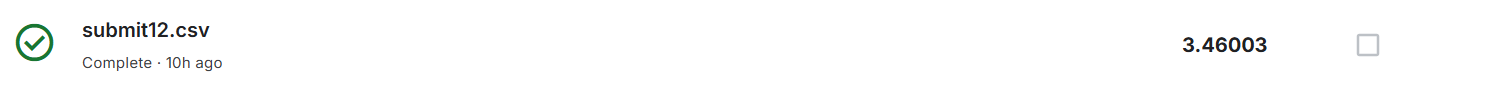

## Coba Menggunakan model `CatboostRegressor`

In [602]:
model_cat = CatBoostRegressor(random_state=42)
model_cat.fit(X_train_scaled, y_train)

Learning rate set to 0.052967
0:	learn: 3.8237729	total: 2.7ms	remaining: 2.7s
1:	learn: 3.7483364	total: 4.84ms	remaining: 2.41s
2:	learn: 3.6760234	total: 6.83ms	remaining: 2.27s
3:	learn: 3.6078499	total: 8.97ms	remaining: 2.23s
4:	learn: 3.5453099	total: 11.7ms	remaining: 2.32s
5:	learn: 3.4893531	total: 13.4ms	remaining: 2.23s
6:	learn: 3.4304748	total: 15.6ms	remaining: 2.22s
7:	learn: 3.3809483	total: 17.5ms	remaining: 2.17s
8:	learn: 3.3325864	total: 18.9ms	remaining: 2.08s
9:	learn: 3.2877068	total: 20.5ms	remaining: 2.03s
10:	learn: 3.2478166	total: 22.2ms	remaining: 2s
11:	learn: 3.2085965	total: 23.4ms	remaining: 1.92s
12:	learn: 3.1707109	total: 24.7ms	remaining: 1.88s
13:	learn: 3.1357924	total: 25.8ms	remaining: 1.82s
14:	learn: 3.1012951	total: 27.4ms	remaining: 1.8s
15:	learn: 3.0726895	total: 28.7ms	remaining: 1.77s
16:	learn: 3.0455990	total: 30.2ms	remaining: 1.75s
17:	learn: 3.0200590	total: 31.4ms	remaining: 1.72s
18:	learn: 2.9929343	total: 33ms	remaining: 1.7s
1

In [603]:
pred2 = model_cat.predict(df_test_scaled)

submission["Nilai_Ujian"] = pred2
submission

,Nama,Nilai_Ujian
0,Ouzen (オーゼン),67.156297
1,"Yuigahama, Yui (由比ヶ浜 結衣)",70.449960
2,Hiei (飛影),69.074064
3,Dabi (荼毘),68.231910
4,"Nikiforov, Victor (ヴィクトル・ニキフォロフ)",68.201115
...,...,...
1037,"Saotome, Mary (早乙女 芽亜里)",67.181610
1038,"Aoyama, Nanami (青山 七海)",65.390176
1039,Tobi (トビ),63.193872
1040,"Evans, Soul Eater (ソウル・イーター・エヴァンス)",69.218423


In [604]:
submission.to_csv('submit13.csv',index = False)

## Hasil Submission dari model `CatboostRegressor`

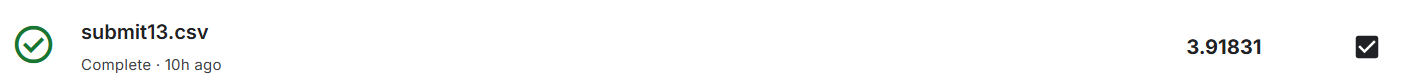

## Coba Menggunakan menggunakan model `SVR`

**Support Vector Regression (SVR)** adalah metode regresi yang berfokus pada membuat garis prediksi (atau kurva pada kasus non-linear) yang berada dalam jarak tertentu dari semua titik data. Tujuannya adalah untuk menemukan garis yang "cukup dekat" dengan data tanpa memperdulikan titik-titik yang sedikit di luar jangkauan toleransi.

Bayangkan sedang meratakan tanah untuk membuat jalan setapak. Anda ingin jalan tersebut lurus dan rapi, namun tidak perlu persis menyentuh setiap tonjolan kecil di tanah; Anda hanya perlu jalur yang rata dalam jarak tertentu dari tonjolan. Begitu pula, SVR menggunakan "margin kesalahan" (disebut epsilon) yang memungkinkan prediksi tetap dalam jarak tertentu dari titik data. Titik-titik yang di luar margin ini (tonjolan di tanah yang lebih tinggi atau lebih rendah) hanya akan sedikit memengaruhi garis utama, membuat prediksi lebih kuat terhadap outlier.

In [608]:
model_svr = SVR(C=1.0, epsilon=0.2)
model_svr.fit(X_train_scaled, y_train)

SVR(epsilon=0.2)

In [609]:
pred3 = model.predict(df_test_scaled)

submission["Nilai_Ujian"] = pred3
submission

,Nama,Nilai_Ujian
0,Ouzen (オーゼン),66.685160
1,"Yuigahama, Yui (由比ヶ浜 結衣)",70.228461
2,Hiei (飛影),68.689772
3,Dabi (荼毘),68.301021
4,"Nikiforov, Victor (ヴィクトル・ニキフォロフ)",68.484939
...,...,...
1037,"Saotome, Mary (早乙女 芽亜里)",66.560336
1038,"Aoyama, Nanami (青山 七海)",65.380647
1039,Tobi (トビ),63.428773
1040,"Evans, Soul Eater (ソウル・イーター・エヴァンス)",69.093045


In [610]:
submission.to_csv('MELEDAK-DUARR-SELAMAT-SEMANGAT-LEKASSEMBUH.csv',index = False)

## Hasil Menggunakan model `SVR`

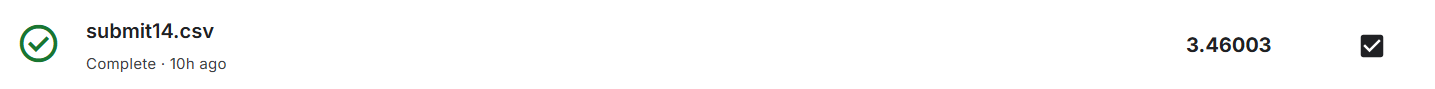

# Terimakasih ^^